# Active Brownian Particles


In [1]:
### Install dependencies
# Substitute pip3.9 with your version
!pip3.9 install matplotlib numpy pybind11
# Compile the module abp
!make

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
g++ -O3 -Wall -shared -std=c++11 -undefined dynamic_lookup  $(python3.9 -m pybind11 --includes) functions.cpp pybind.cpp -o abp$(python3.9-config --extension-suffix)


In [2]:
### Import modules
import matplotlib.pyplot as plt
import numpy as np
import math
from abp import ABP_2d, point, region

In [3]:
### Define some useful functions
# Compute times from bool array
def calculate_reactive_times(bool_array):
    times = bool_array
    times[times==True] = 1
    times[times==False] = 0
    times = np.where(times==1)[0]
    times = np.array([times[i]-times[i-1]-1 for i in range(1,len(times)) ])
    times = times[times!=0]
    return times


## Stochastic Dynamics

Let us consider an active bwroninan particle moving in a potential given by <br>

$V(x,y) = k\bigl[ \sin\bigl(\frac{8\pi}{L}\bigl(x+\frac{3L}{16}\bigr)\bigr) + \sin\bigl(\frac{8\pi}{L}\bigl(y+\frac{3L}{16}\bigr)\bigr)\bigr]$. <br>

The particle changes velocity direction according to a random walk with velocity (chirality) $w$. The discretized dynamics equations in Ito prescription are: <br>

$x_{n+1} = x_n + v \cos(\theta_n) dt + \mu F_x(x_n,y_n)dt+ \sqrt{2D_rdt}\; \eta_x  $, <br>

$y_{n+1} = y_n + v \sin(\theta_n) dt + \mu F_y(x_n,y_n)dt +\sqrt{2D_rdt} \; \eta_y $, <br>

$ \theta_{n+1} = \theta_n + wdt + \sqrt{2D_{\theta}dt} \; \eta_{\theta}$. <br>

where $\eta_x, \eta_y, \eta_{\theta}$ are independent white gaussian noises. <br>

## Potential plot

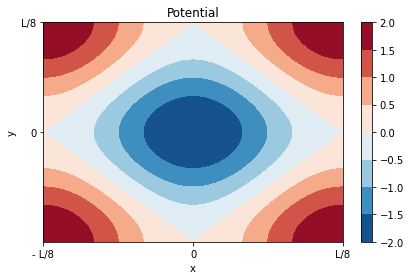

In [4]:
### Contour plot of potential
# Define potential function
L = 1.0
k=1.0
def potential(x, y):
    return k*(np.sin(8*math.pi*(x +3./16.*L)/L) + np.sin(8*math.pi*(y+3./16.*L)/L))

# Mesh grid
x = np.linspace(-L/8, L/8, 1000)
y = np.linspace(-L/8, L/8, 1000)
xx, yy = np.meshgrid(x, y)

# Potential
zz = potential(xx,yy)

# Plot
cf = plt.contourf(xx,yy, zz, cmap="RdBu_r")
plt.colorbar()

# Rendering
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("y")
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("potential.png")

## Case 1: R and T are both minima

### Passive Particle

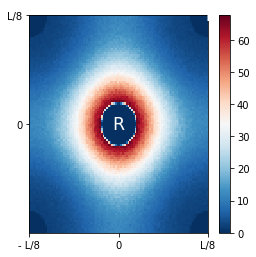

In [5]:
fig =  plt.figure(figsize=(4, 4))
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]

# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/8,y=L/8,radius=L/40.0)

# Define parameters]
v = 0
D_theta = 0
# Compute statistics
particle = ABP_2d(reactant,target, num_steps = 10**7, dt=1e-4, v=v, D_r=1.0, D_theta= D_theta, k=1.0, L=1.0, mu=1.0, w=0.0)
particle.dynamics(track_in_reactant=True, track_in_target=True)
# Retireve data
x_dyn= np.array(particle.position_x)
y_dyn = np.array(particle.position_y)
reactive_path = np.array(particle.reactive_path)
is_outside = np.logical_and(np.logical_not(particle.bool_reactant), np.logical_not(particle.bool_target))
x_dyn = x_dyn[is_outside]
y_dyn = y_dyn[is_outside]
#Plot
h = plt.hist2d(x_dyn, y_dyn, bins = 100,cmap="RdBu_r", density = True)
plt.text(reactant.x, reactant.y, "R", c = "white", size ="xx-large", ha = "center" , va="center")
plt.text(target.x, target.y, "T",c = "white", size ="xx-large" , ha = "center", va="center")
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.colorbar(h[3])

### Active particle

/var/folders/m_/s5f9rn3j5nb17nbdtfyy_nm80000gn/T/ipykernel_4310/3788173515.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


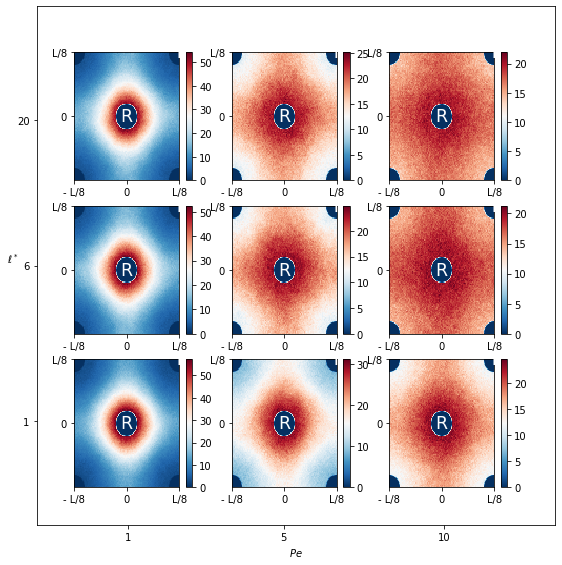

In [6]:
### Transition probability density plot
pe_vec = [1,5,10]
lstar_vec = [20,6, 1]
v_max = 8*math.pi


fig =  plt.figure(figsize=(8, 8))
sax = fig.add_axes([0.06, 0.06, 0.9, 0.9])
#sax.set_autoscale_on(True)


# hide tick and tick label of the big axes
s_xticks = [0.177, 0.4767, 0.7853]
s_yticks = [0.78, 0.5, 0.2]
sax.set_xticks(s_xticks, pe_vec)
sax.set_yticks(s_yticks, lstar_vec)
sax.grid(False)
sax.set_xlabel("$Pe$")
sax.set_ylabel("$\ell^*$", rotation = 0)


x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]


# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/8,y=L/8,radius=L/40.0)



for i in range(3):
    for j in range(3):
        n = i*3+j
        ax = fig.add_subplot(3,3,n+1)
        # Define parameters
        pe = pe_vec[j]
        l_star = lstar_vec[i]
        v = pe*v_max
        D_theta = float(pe*v_max*v_max/(1.*l_star))
        # Compute statistics
        particle = ABP_2d(reactant,target, num_steps = 10**7, dt=1e-5, v=v, D_r=1.0, D_theta= D_theta, k=1.0, L=1.0, mu=1.0, w=0.0)
        particle.dynamics(track_in_reactant=True, track_in_target=True)
        # Retireve data
        x_dyn= np.array(particle.position_x)
        y_dyn = np.array(particle.position_y)
        reactive_path = np.array(particle.reactive_path)
        is_outside = np.logical_and(np.logical_not(particle.bool_reactant), np.logical_not(particle.bool_target))
        x_dyn = x_dyn[is_outside]
        y_dyn = y_dyn[is_outside]
        #Plot
        h = ax.hist2d(x_dyn, y_dyn, bins = 100,cmap="RdBu_r", density = True)
        ax.text(reactant.x, reactant.y, "R", c = "white", size ="xx-large", ha = "center" , va="center")
        ax.text(target.x, target.y, "T",c = "white", size ="xx-large" , ha = "center", va="center")
        ax.set_xticks(x_ticks, x_labels)
        ax.set_yticks(y_ticks, y_labels)
        fig.colorbar(h[3], ax=ax)


        
#fig.tight_layout(pad=0.2)
fig.savefig("reactive_prob.png")
fig.show()



3.1415925971368694 -3.1415922156580924


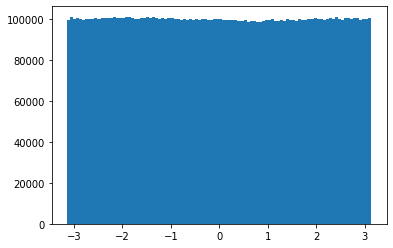

In [7]:
theta = np.array(particle.theta)
plt.hist(theta, bins =100)
print(max(theta), min(theta))

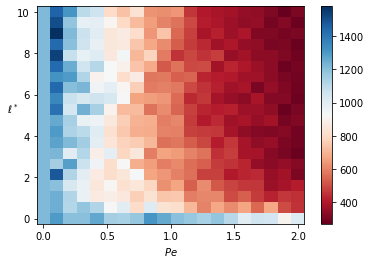

In [8]:
### Average reactive time steps
# Define a grid of peclet and lstar
pe_dim = 20
lstar_dim = 20
pe_vec = np.linspace(0,2,pe_dim)
lstar_vec = np.linspace(0.01,10,num=lstar_dim)

# Initialize the matrux to save times
matrix_t = np.zeros((lstar_dim, pe_dim))



for i in range(lstar_dim):
    for j in range(pe_dim):
        pe = pe_vec[j]
        l_star = lstar_vec[i]
        v = pe*v_max
        D_theta = float(pe*v_max*v_max/l_star)
        # Compute statistics
        particle = ABP_2d(reactant,target, num_steps = 10**5, dt=1e-4, v=v, D_r=1.0, D_theta= D_theta, k=1.0, L=1.0, mu=1.0, w=0.0)
        particle.dynamics(track_transition_path=False)
        # Retireve data
        path = np.array(particle.reactive_path)
        # Calculate times
        times = calculate_reactive_times(path)
        # Fill matrix
        matrix_t[i][j] = np.mean(times)    

plt.xlabel("$Pe$")
plt.ylabel("$\ell^*$", rotation = 0)
plt.pcolormesh(pe_vec, lstar_vec, matrix_t, cmap="RdBu")
plt.colorbar()

In [ ]:
### Transition Rates
# Define a grid of peclet and lstar
pe_dim = 20
lstar_dim = 20
pe_vec = np.linspace(0,10,pe_dim)
lstar_vec = np.linspace(0.01,10,num=lstar_dim)

# Initialize the matrux to save times
matrix_r = np.zeros((lstar_dim, pe_dim))



for i in range(lstar_dim):
    for j in range(pe_dim):
        pe = pe_vec[j]
        l_star = lstar_vec[i]
        v = pe*v_max
        D_theta = float(pe*v_max*v_max/l_star)
        # Compute statistics
        particle = ABP_2d(reactant,target, num_steps = 10**5, dt=1e-4, v=v, D_r=1.0, D_theta= D_theta, k=1.0, L=1.0, mu=1.0, w=0.0)
        particle.theta = [0] #Set initial angle to zero
        particle.dynamics(track_reactive_path=False)
        # Retireve data
        path = np.array(particle.transition_path)
        # Calculate times
        times = calculate_reactive_times(path)
        # Fill matrix
        matrix_r[i][j] = 1./np.mean(times)   
        
plt.xlabel("$Pe$")
plt.ylabel("$\ell^*$", rotation = 0)
plt.pcolormesh(pe_vec, lstar_vec, matrix_r, cmap="RdBu_r")
plt.colorbar()
